In [257]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import shape
import contextily as ctx 
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [76]:
sd = pd.read_csv('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/personal work/data/social_demographic.csv')
lfb = pd.read_csv('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/personal work/data/LFB Incident data from 2018 onwards.csv')
borough = gpd.read_file('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/personal work/data/london_borough.geojson')

In [91]:
print(lfb.columns)

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')


In [78]:
print(borough.crs)
borough['Area_km2'] = borough['HECTARES'] / 100
borough

EPSG:4326


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Area_km2
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"MULTIPOLYGON (((516401.6 160201.8, 516407.3 16...",37.26117
1,Croydon,E09000008,8649.441,0.000,F,None,None,"MULTIPOLYGON (((535009.2 159504.7, 535005.5 15...",86.49441
2,Bromley,E09000006,15013.487,0.000,F,None,None,"MULTIPOLYGON (((540373.6 157530.4, 540361.2 15...",150.13487
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"MULTIPOLYGON (((521975.8 178100, 521967.7 1780...",56.58541
4,Ealing,E09000009,5554.428,0.000,F,None,None,"MULTIPOLYGON (((510253.5 182881.6, 510249.9 18...",55.54428
5,Havering,E09000016,11445.735,210.763,F,None,None,"MULTIPOLYGON (((549893.9 181459.8, 549894.6 18...",114.45735
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"MULTIPOLYGON (((510599.8 191689.5, 510615.2 19...",115.70063
7,Harrow,E09000015,5046.330,0.000,F,None,None,"MULTIPOLYGON (((510599.8 191689.5, 510660 1916...",50.46330
8,Brent,E09000005,4323.270,0.000,F,None,None,"MULTIPOLYGON (((525201 182512.6, 525181.5 1825...",43.23270
9,Barnet,E09000003,8674.837,0.000,F,None,None,"MULTIPOLYGON (((524579.9 198355.2, 524594.3 19...",86.74837


In [79]:
print(f"Total number of rows: {len(lfb)}")

Total number of rows: 783134


In [90]:
lfb = lfb[~lfb['PropertyCategory'].isin(['Aircraft', 'Boat', 'Rail Vehicle'])]
lfb = lfb.dropna(subset=['PropertyCategory'])

unique_property_types = lfb['PropertyCategory'].unique()

for property_type in unique_property_types:
    print(property_type)

print(f"Total number of rows: {len(lfb)}")


Non Residential
Outdoor Structure
Road Vehicle
Dwelling
Outdoor
Other Residential
Total number of rows: 781624


In [94]:

selected_columns = [
    'DateOfCall',
    'IncGeo_BoroughCode',
    'Latitude',
    'Longitude',
    'IncidentStationGround',
    'FirstPumpArriving_AttendanceTime',
    'PropertyCategory',
]

lfb_selected = lfb[selected_columns]

print(lfb_selected.head())

  DateOfCall IncGeo_BoroughCode   Latitude  Longitude IncidentStationGround  \
0  01-Jan-18          E09000003  51.589900  -0.165453              Finchley   
1  01-Jan-18          E09000006  51.408463  -0.025394             Beckenham   
2  01-Jan-18          E09000010  51.621823  -0.096022              Edmonton   
3  01-Jan-18          E09000010  51.659894  -0.052524               Enfield   
4  01-Jan-18          E09000025  51.549924   0.009877             Stratford   

   FirstPumpArriving_AttendanceTime   PropertyCategory  
0                             348.0    Non Residential  
1                             144.0    Non Residential  
2                             232.0  Outdoor Structure  
3                              22.0       Road Vehicle  
4                             241.0       Road Vehicle  


In [95]:
missing_values = lfb_selected.isnull().sum()
total_rows = len(lfb_selected)

print(missing_values)
print(f"Total number of rows: {total_rows}")

DateOfCall                               0
IncGeo_BoroughCode                       0
Latitude                            433355
Longitude                           433355
IncidentStationGround                    1
FirstPumpArriving_AttendanceTime     44238
PropertyCategory                         0
dtype: int64
Total number of rows: 781624


In [97]:
lfb_selected = lfb_selected.dropna(subset=['IncidentStationGround' ])
lfb_station = lfb_selected.groupby('IncGeo_BoroughCode')['IncidentStationGround'].nunique().reset_index(name='fire station')

print(lfb_station)

   IncGeo_BoroughCode  fire station
0           E09000001             5
1           E09000002             5
2           E09000003             9
3           E09000004             5
4           E09000005             9
5           E09000006            11
6           E09000007             8
7           E09000008            10
8           E09000009             8
9           E09000010             7
10          E09000011            10
11          E09000012             9
12          E09000013             8
13          E09000014             9
14          E09000015             4
15          E09000016             5
16          E09000017            11
17          E09000018            10
18          E09000019            10
19          E09000020             6
20          E09000021             4
21          E09000022             9
22          E09000023            11
23          E09000024             7
24          E09000025            11
25          E09000026             8
26          E09000027       

In [229]:
lfb_count = lfb_selected.groupby('IncGeo_BoroughCode').size().reset_index(name='Number of fire incidents')

lfb_selected_clean = lfb_selected.dropna(subset=['FirstPumpArriving_AttendanceTime'])
lfb_time = lfb_selected_clean.groupby('IncGeo_BoroughCode')['FirstPumpArriving_AttendanceTime'].mean().reset_index(name='response times')

lfb_count_time = pd.merge(lfb_count, lfb_time, on='IncGeo_BoroughCode')
lfb_all = pd.merge(lfb_count_time, sd, left_on='IncGeo_BoroughCode', right_on='Code', how='left')
lfb_total = pd.merge(borough, lfb_all, left_on='GSS_CODE', right_on='Code', how='left')
lfb_final = pd.merge(lfb_total, lfb_station, left_on='GSS_CODE', right_on='IncGeo_BoroughCode', how='left')
selected_columns = [
    'Code',
    'Area',
    'Number of fire incidents',
    'median_income',
    'unemployment_rate_avg',
    'educational_attainment',
    'Population',
    'response times',
    'Area_km2',
    'fire station'
]

lfb_final = lfb_final[selected_columns]

#lfb_final = lfb_final[(lfb_final['Code'] != 'E09000033')]
#lfb_final = lfb_final[(lfb_final['Code'] != 'E09000033') & (lfb_final['Code'] != 'E09000007')]

lfb_final


,Code,Area,Number of fire incidents,median_income,unemployment_rate_avg,educational_attainment,Population,response times,Area_km2,fire station
0,E09000021,Kingston-upon-Thames,10318,35900,3.70,0.618,170454,328.707009,37.26117,4
1,E09000008,Croydon,32156,30400,5.25,0.408,397741,310.395925,86.49441,10
2,E09000006,Bromley,22449,35800,4.40,0.499,331162,356.271136,150.13487,11
3,E09000018,Hounslow,20628,29300,4.65,0.506,295706,335.033666,56.58541,10
4,E09000009,Ealing,26870,30900,5.05,0.609,375340,328.193693,55.54428,8
5,E09000016,Havering,16901,29800,3.70,0.326,268145,355.162733,114.45735,5
6,E09000017,Hillingdon,24305,30600,5.30,0.423,319018,374.398099,115.70063,11
7,E09000015,Harrow,13432,32300,4.55,0.498,263448,341.982350,50.46330,4
8,E09000005,Brent,24814,30000,6.40,0.457,344521,343.854330,43.23270,9
9,E09000003,Barnet,27003,33500,5.25,0.509,395007,343.247719,86.74837,9


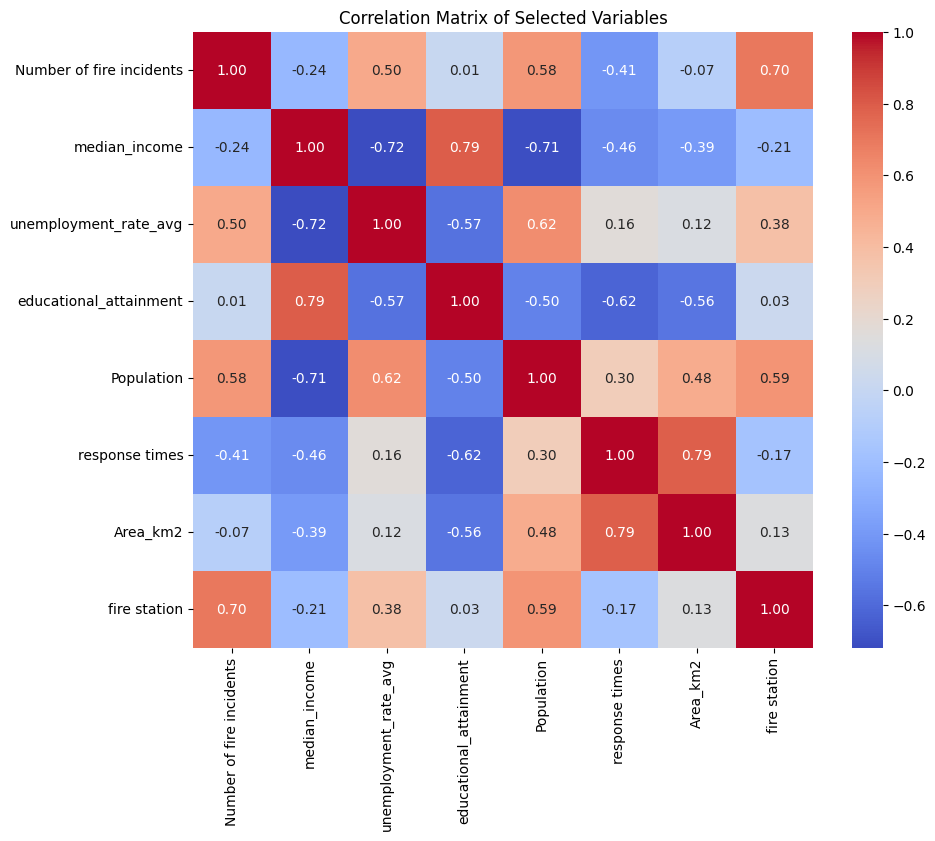

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# 選擇要檢查相關性的變數
correlation_columns = [
    'Number of fire incidents',
    'median_income',
    'unemployment_rate_avg',
    'educational_attainment',
    'Population',
    'response times',
    'Area_km2',
    'fire station'
]

# 計算相關係數矩陣
correlation_matrix = lfb_final[correlation_columns].corr()

# 使用 seaborn 繪製熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

vif_columns = [
    'Number of fire incidents',
    'median_income',
    'unemployment_rate_avg',
    'educational_attainment',
    'Population',
    'response times',
    'Area_km2',
    'fire station'
]

X = lfb_final[vif_columns].dropna()

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# calculate the VIF of each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = vif_columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

                   Variable       VIF
0  Number of fire incidents  4.938916
1             median_income  5.495296
2     unemployment_rate_avg  3.527485
3    educational_attainment  4.592972
4                Population  5.240205
5            response times  6.562562
6                  Area_km2  5.169451
7              fire station  2.548711


In [222]:
import statsmodels.api as sm
import pandas as pd

Y = lfb_final['Number of fire incidents']
X = lfb_final[['unemployment_rate_avg','Population', 'response times', 'fire station','Area_km2']]
X = sm.add_constant(X)  # Adds a column of ones to the predictors

# build the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()

# show the model summary
print(results.summary())

#lfb_final[['median_income', 'unemployment_rate_avg', 'educational_attainment', 
#               'Population', 'response times', 'Area_km2', 'fire station']]

                               OLS Regression Results                               
Dep. Variable:     Number of fire incidents   R-squared:                       0.792
Model:                                  OLS   Adj. R-squared:                  0.752
Method:                       Least Squares   F-statistic:                     19.80
Date:                      Mon, 13 Jan 2025   Prob (F-statistic):           4.00e-08
Time:                              16:42:14   Log-Likelihood:                -304.52
No. Observations:                        32   AIC:                             621.0
Df Residuals:                            26   BIC:                             629.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

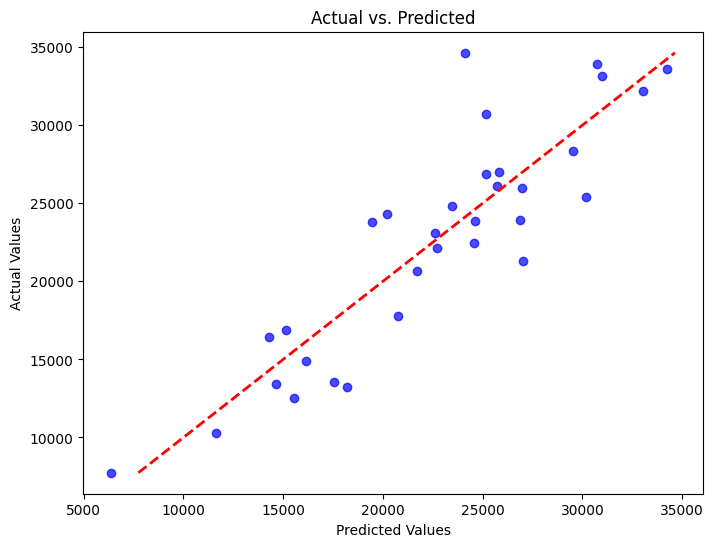

In [218]:
import matplotlib.pyplot as plt

# 繪製實際值與預測值
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, Y, alpha=0.7, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2)  # 理想線
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted')
plt.show()

In [207]:
lfb_final['Residuals'] = Y - results.fittedvalues

# find the outlier
outlier = lfb_final.loc[lfb_final['Residuals'].idxmax()]

print("異常值：")
print(outlier)

異常值：
Code                           E09000007
Area                              Camden
Number of fire incidents           34636
median_income                      38900
unemployment_rate_avg                5.3
educational_attainment             0.656
Population                        220903
response times                298.282924
Area_km2                        21.78932
fire station                           8
Residuals                   10705.842629
Name: 25, dtype: object


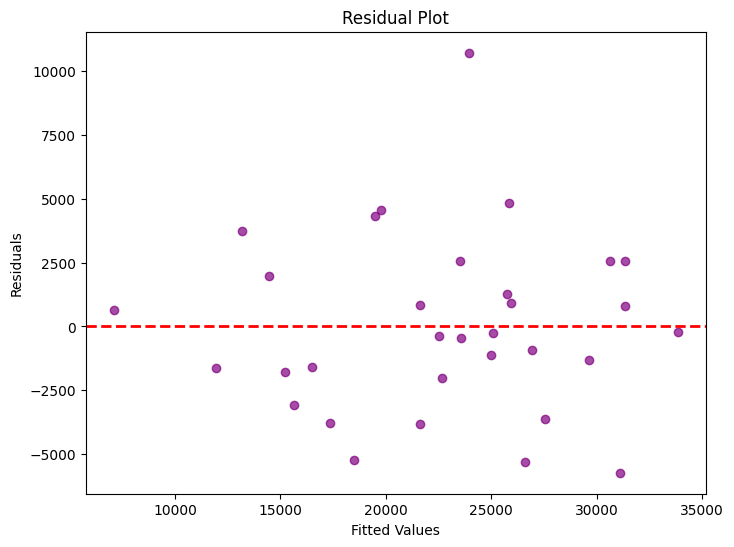

In [208]:
# residual plot
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, results.resid, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # baseline
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<Figure size 800x600 with 0 Axes>

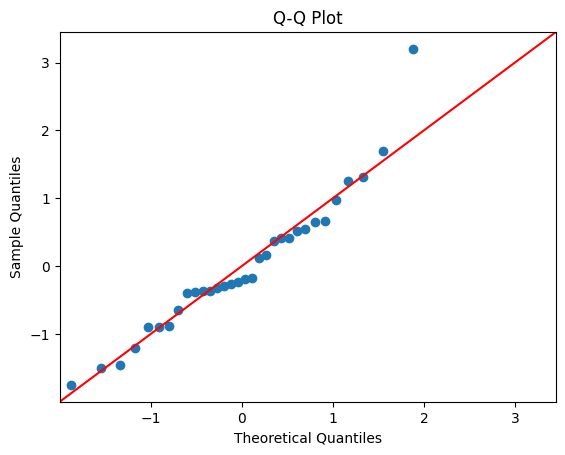

In [214]:
import statsmodels.api as sm

# Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(results.resid, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

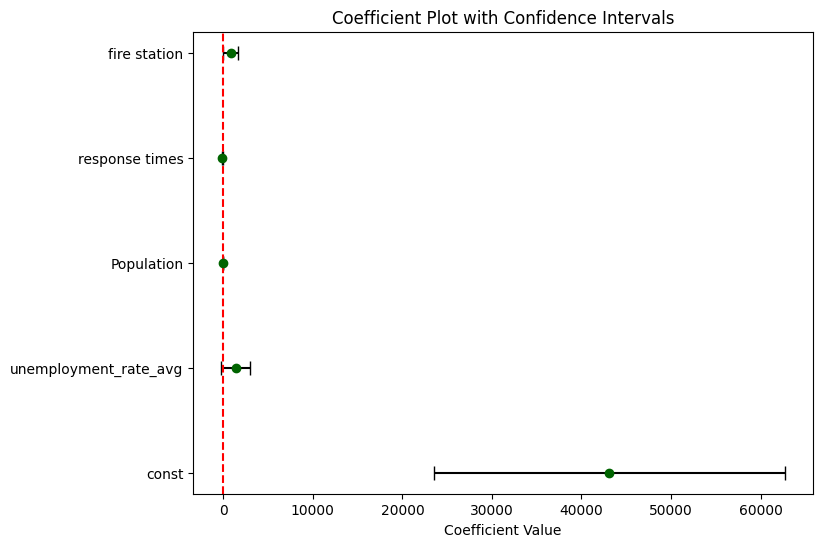

In [210]:
import numpy as np

# coefficient plot
coef = results.params
conf_int = results.conf_int()
variables = coef.index

plt.figure(figsize=(8, 6))
plt.errorbar(coef, np.arange(len(coef)), xerr=(conf_int[1] - conf_int[0]) / 2, fmt='o', color='darkgreen', ecolor='black', capsize=5)
plt.axvline(x=0, color='red', linestyle='--')
plt.yticks(np.arange(len(coef)), variables)
plt.xlabel('Coefficient Value')
plt.title('Coefficient Plot with Confidence Intervals')
plt.show()

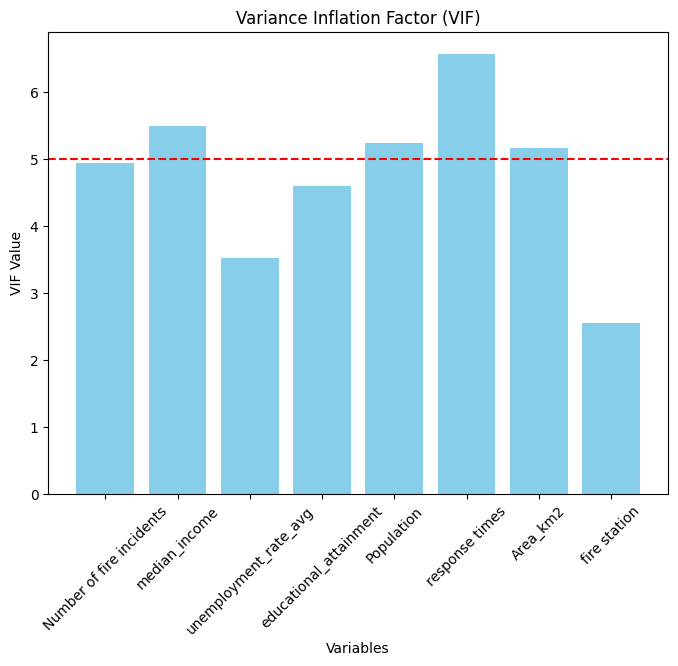

In [211]:

# VIF
plt.figure(figsize=(8, 6))
plt.bar(vif_data['Variable'], vif_data['VIF'], color='skyblue')
plt.axhline(y=5, color='red', linestyle='--')  # VIF > 5 is considered to have multicollinearity
plt.xlabel('Variables')
plt.ylabel('VIF Value')
plt.title('Variance Inflation Factor (VIF)')
plt.xticks(rotation=45)
plt.show()

In [270]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = lfb_final[['Number of fire incidents', 'unemployment_rate_avg', 'Population', 'response times']]

# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# set the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# fit the model
kmeans.fit(data_scaled)

# get the cluster labels
lfb_final['Cluster'] = kmeans.labels_
lfb_final

,Code,Area,Number of fire incidents,median_income,unemployment_rate_avg,educational_attainment,Population,response times,Area_km2,fire station,Cluster,PCA1,PCA2
0,E09000021,Kingston-upon-Thames,10318,35900,3.70,0.618,170454,328.707009,37.26117,4,2,-1.974199,0.878441
1,E09000008,Croydon,32156,30400,5.25,0.408,397741,310.395925,86.49441,10,0,1.730802,-0.416152
2,E09000006,Bromley,22449,35800,4.40,0.499,331162,356.271136,150.13487,11,2,0.457630,1.343336
3,E09000018,Hounslow,20628,29300,4.65,0.506,295706,335.033666,56.58541,10,2,0.123635,0.761211
4,E09000009,Ealing,26870,30900,5.05,0.609,375340,328.193693,55.54428,8,2,1.266279,0.376799
5,E09000016,Havering,16901,29800,3.70,0.326,268145,355.162733,114.45735,5,2,-0.735683,1.475044
6,E09000017,Hillingdon,24305,30600,5.30,0.423,319018,374.398099,115.70063,11,2,1.074507,1.775250
7,E09000015,Harrow,13432,32300,4.55,0.498,263448,341.982350,50.46330,4,2,-0.509835,1.336804
8,E09000005,Brent,24814,30000,6.40,0.457,344521,343.854330,43.23270,9,2,1.794834,0.960288
9,E09000003,Barnet,27003,33500,5.25,0.509,395007,343.247719,86.74837,9,2,1.624879,0.868013


In [276]:
import pandas as pd

# create the population density field
lfb_final['population density'] = lfb_final['Population'] / lfb_final['Area_km2']

columns_to_average = [
    'Number of fire incidents', 
    'unemployment_rate_avg', 
    'response times',
    'fire station',
    'population density'
]

cluster_averages = lfb_final.groupby('Cluster')[columns_to_average].mean().reset_index()
print(cluster_averages)

   Cluster  Number of fire incidents  unemployment_rate_avg  response times  \
0        0              28563.615385               4.911538      291.869648   
1        1               7744.000000               0.000000      285.419386   
2        2              19222.444444               4.755556      338.729636   
3        3              56548.000000               4.700000      305.949008   

   fire station  population density  
0      9.384615        10608.426055  
1      5.000000         4274.437833  
2      7.555556         4972.281986  
3      9.000000         9600.886062  


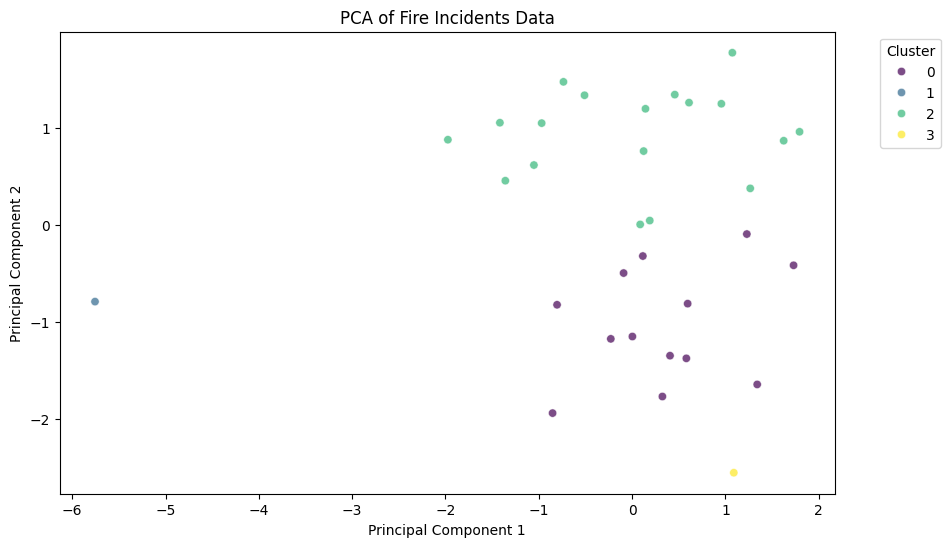

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 選擇要降維的數據
data = lfb_final[['Number of fire incidents', 'unemployment_rate_avg', 'Population', 'response times']]

# 標準化數據
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 使用 PCA 降維到 2 維
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 將降維後的數據加入 DataFrame
lfb_final['PCA1'] = data_pca[:, 0]
lfb_final['PCA2'] = data_pca[:, 1]

# 繪製降維後的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    data=lfb_final, 
    palette='viridis',
    alpha=0.7
)

plt.title('PCA of Fire Incidents Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [261]:
merged_data = pd.merge(borough, lfb_final, left_on='GSS_CODE', right_on='Code', how='left')
borough_geo = gpd.GeoDataFrame(merged_data, geometry='geometry')
print(borough_geo.dtypes)
print(borough_geo.crs)
borough_geo.to_file("borough_geo.json", driver="GeoJSON")

In [262]:
borough_geo

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Area_km2_x,Code,...,median_income,unemployment_rate_avg,educational_attainment,Population,response times,Area_km2_y,fire station,Cluster,PCA1,PCA2
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"MULTIPOLYGON (((516401.6 160201.8, 516407.3 16...",37.26117,E09000021,...,35900,3.70,0.618,170454,328.707009,37.26117,4,2,-1.974199,0.878441
1,Croydon,E09000008,8649.441,0.000,F,None,None,"MULTIPOLYGON (((535009.2 159504.7, 535005.5 15...",86.49441,E09000008,...,30400,5.25,0.408,397741,310.395925,86.49441,10,0,1.730802,-0.416152
2,Bromley,E09000006,15013.487,0.000,F,None,None,"MULTIPOLYGON (((540373.6 157530.4, 540361.2 15...",150.13487,E09000006,...,35800,4.40,0.499,331162,356.271136,150.13487,11,2,0.457630,1.343336
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"MULTIPOLYGON (((521975.8 178100, 521967.7 1780...",56.58541,E09000018,...,29300,4.65,0.506,295706,335.033666,56.58541,10,2,0.123635,0.761211
4,Ealing,E09000009,5554.428,0.000,F,None,None,"MULTIPOLYGON (((510253.5 182881.6, 510249.9 18...",55.54428,E09000009,...,30900,5.05,0.609,375340,328.193693,55.54428,8,2,1.266279,0.376799
5,Havering,E09000016,11445.735,210.763,F,None,None,"MULTIPOLYGON (((549893.9 181459.8, 549894.6 18...",114.45735,E09000016,...,29800,3.70,0.326,268145,355.162733,114.45735,5,2,-0.735683,1.475044
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"MULTIPOLYGON (((510599.8 191689.5, 510615.2 19...",115.70063,E09000017,...,30600,5.30,0.423,319018,374.398099,115.70063,11,2,1.074507,1.775250
7,Harrow,E09000015,5046.330,0.000,F,None,None,"MULTIPOLYGON (((510599.8 191689.5, 510660 1916...",50.46330,E09000015,...,32300,4.55,0.498,263448,341.982350,50.46330,4,2,-0.509835,1.336804
8,Brent,E09000005,4323.270,0.000,F,None,None,"MULTIPOLYGON (((525201 182512.6, 525181.5 1825...",43.23270,E09000005,...,30000,6.40,0.457,344521,343.854330,43.23270,9,2,1.794834,0.960288
9,Barnet,E09000003,8674.837,0.000,F,None,None,"MULTIPOLYGON (((524579.9 198355.2, 524594.3 19...",86.74837,E09000003,...,33500,5.25,0.509,395007,343.247719,86.74837,9,2,1.624879,0.868013
